In [65]:
# -*- coding: utf-8 -*-
from __future__ import (
    division,
    print_function,
)

import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
import cv2
import imutils

import helper
from helper import *
import prepare_lib

import importlib
#% autoreload

In [97]:
importlib.reload(helper)
importlib.reload(prepare_lib)

# path = 'HOG/test/20171118_130335.jpg'
# path = 'HOG/test/20171118_130327.jpg'                       # (nur Funktionsknopf!!!! Nicht Temp.)
# path = 'HOG/test/20171118_133018.jpg'
path = 'HOG/test/20171118_130337.jpg'
# img = cv2.imread('HOG/test/20171118_130340.jpg')
# img = cv2.imread('../images/train/10/20171118_095346.jpg')     # ab scale > 450: Fuktionsknopf wird nicht gefunden
# img = cv2.imread('HOG/test/20171118_130322.jpg')
# img = cv2.imread('HOG/test/20171118_130328.jpg')
# img = cv2.imread('HOG/test/20171118_130333.jpg')
# img = cv2.imread('HOG/test/20171118_133020.jpg')
# img = cv2.imread('HOG/test/20171118_133022.jpg')
# img = cv2.imread('HOG/test/20171118_133024.jpg')
# img = cv2.imread('HOG/test/20171118_133026.jpg')        # (nur Funktionsknopf!!!! Nicht Temp.)
# img = cv2.imread('HOG/test/20171118_133028.jpg')
# img = cv2.imread('HOG/test/20171118_133030.jpg')
# img = cv2.imread('HOG/test/test.jpg')


img = prepare_lib.prepareImage(path)

In [98]:
###### Preprocessing

gray_eq = img.equalize_gray_Hist()
gray_CLAHE = img.equalize_gray_Hist_CLAHE()

edges_eq = img.edgeDetector(gray_eq)
edges_CLAHE = img.edgeDetector(gray_CLAHE)
edges = edges_eq + edges_CLAHE
# print(edges_eq.shape)
# print(edges.shape)

# # Hough
HoughLines = img.hough_transformation_line(edges, 0.15)

# get mask
mask, hull = helper.extractMask(img.img.shape[0], img.img.shape[1], HoughLines)
# print(np.shape(mask))
# print(np.shape(img))

# perform GrabCut
imgGC = img.performGrabCut(mask, 6)

# cut image
imgCut = img.cutImage(hull)

In [99]:
candidates = img.performSelectiveSearch(450, minRectSize = 2000, w2h=1.4, useCutImage=False)
#candidatesOrigin = helper.performSelectiveSearch(img, 450, minRectSize = 2000, w2h=1.4)
print(candidates)

{(484, 0, 368, 300), (500, 178, 142, 128), (484, 0, 368, 306), (311, 213, 130, 106), (485, 95, 185, 205), (311, 213, 112, 106), (316, 213, 107, 93), (500, 178, 140, 108), (434, 0, 418, 319), (485, 95, 249, 205), (301, 152, 166, 153), (505, 178, 135, 108), (485, 143, 185, 157), (324, 180, 143, 125), (508, 178, 132, 103)}


In [100]:
candidates = helper.reduceRect(candidates)
print('Final')
print(candidates)

Final
{(301, 152, 166, 167), (301, 0, 551, 319)}


resulting rectangle:
301 152 166 167
301 0 551 319


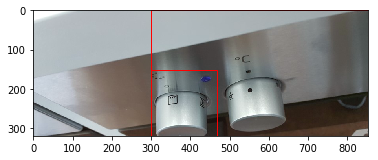

In [101]:
# draw rectangles on the original image
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
plt.imshow(img.imgCut)

# for x, y, w, h in candidatesOrigin:
#     print(x, y, w, h)
#     rect = mpatches.Rectangle(
#         (x, y), w, h, fill=False, edgecolor='green', linewidth=1)
#     ax.add_patch(rect)

print('resulting rectangle:')
for x, y, w, h in candidates:
    print(x, y, w, h)
    rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)

plt.show()